导入库

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

初始化

In [2]:
sigma_0=0.1
sigma_1=sigma_0
sigma_2=0.2
mu_1=10
mu_2=np.random.normal(0, sigma_2, 1 )
v=1
H=1
K=(H*sigma_1**2)/(H**2*sigma_1**2+sigma_2**2)

mu_fused=mu_1
sigma_fused=sigma_1

length=21.0
mu_t=np.arange(length)#optimal estimate value
sigma_t=np.arange(length)
z_t=np.arange(length)#measure value
x_t=np.arange(length)#pridiction value
t=np.arange(length)

t[0] = 0
mu_t[0] = mu_fused
sigma_t[0] = sigma_fused
x_t[0]=mu_1
z_t[0]=mu_2

In [ ]:
迭代

In [4]:
for i in range(1,int(length)):
    mu_1=np.random.normal(mu_fused+v, sigma_fused, 1 )
    mu_2=np.random.normal(i, sigma_2, 1 )
    mu_fused=mu_1+K*(mu_2-H*mu_1)
    sigma_fused=math.sqrt( sigma_1**2-K*H*sigma_1**2)
    sigma_1=sigma_fused
    print(i,mu_1, mu_2, mu_fused,sigma_fused)
    #
    t[i]=i
    mu_t[i]=mu_fused
    sigma_t[i]=sigma_fused
    x_t[i] = mu_1
    z_t[i] = mu_2

1 [21.01762015] [0.95490234] [17.00507658] 0.009603838834994462
2 [18.00665024] [1.88075985] [14.78147216] 0.008589934592000002
3 [15.78224467] [3.05275238] [13.23634621] 0.00768307106799557
4 [14.24518212] [3.91804198] [12.17975409] 0.006871947673600001
5 [13.19136302] [4.97285603] [11.54766162] 0.006146456854396456
6 [12.55580611] [6.40337538] [11.32531996] 0.005497558138880001
7 [12.32640734] [7.059371] [11.27300007] 0.004917165483517165
8 [12.27622437] [7.68680518] [11.35834053] 0.004398046511104001
9 [12.35431962] [8.79239417] [11.64193453] 0.003933732386813732
10 [12.64055983] [9.97651997] [12.10775186] 0.003518437208883201
11 [13.1106749] [11.24492275] [12.73752447] 0.0031469859094509856
12 [13.73965443] [12.21291616] [13.43430678] 0.0028147497671065606
13 [14.42996222] [12.83357503] [14.11068478] 0.0025175887275607884
14 [15.11079216] [14.09262167] [14.90715806] 0.0022517998136852486
15 [15.90918156] [15.2083925] [15.76902375] 0.002014070982048631
16 [16.76900696] [15.86045027]

可视化

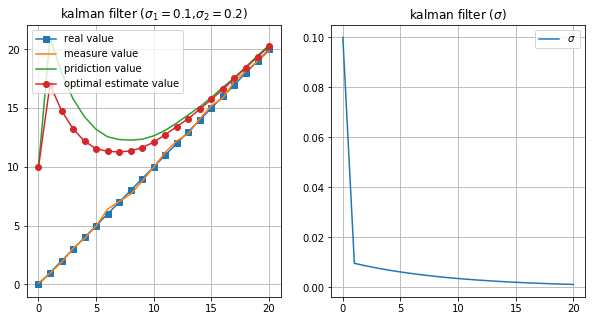

In [5]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].plot(t,t,label="real value",marker='s')
ax[0].plot(t,z_t,label="measure value")
ax[0].plot(t,x_t,label="pridiction value")
ax[0].plot(t,mu_t,label="optimal estimate value",marker='o')
ax[0].legend(loc=2)
ax[0].grid(True)
ax[0].set_title('kalman filter ($\sigma_1=$'+str(sigma_0)+',$\sigma_2=$'+str(sigma_2)+')')

ax[1].plot(t,sigma_t,label="$\sigma$")
ax[1].legend(loc=1)
ax[1].grid(True)
ax[1].set_title('kalman filter ($\sigma$)')

plt.show()